In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Creating a data to view

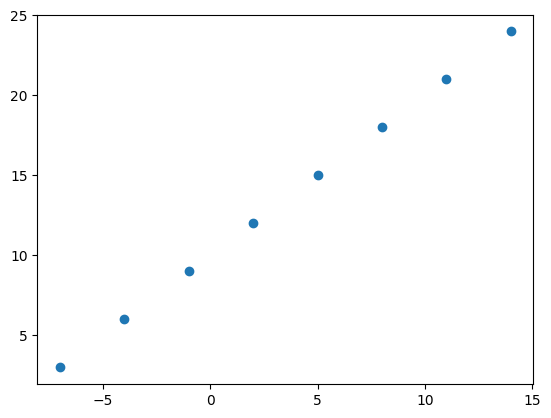

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X, y);

Regression input shapes and output shapes

In [3]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 349ms/step - loss: 19.1011 - mae: 19.1011
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 18.8199 - mae: 18.8199
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 18.5386 - mae: 18.5386
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 18.2574 - mae: 18.2574
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 17.9761 - mae: 17.9761


In [12]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[-16.065535]], dtype=float32)

Improving the model

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 348ms/step - loss: 9.0360 - mae: 9.0360
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9035 - mae: 8.9035
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7710 - mae: 8.7710
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6385 - mae: 8.6385
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5060 - mae: 8.5060
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3735 - mae: 8.3735
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2410 - mae: 8.2410
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1085 - mae: 8.1085
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9760 - mae: 7.9760
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8435 - mae: 7.8435
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - los

In [15]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [16]:
model.predict([17.0]) #(y = X + 10)

1/1 [==============================] - 0s 77ms/step


array([[30.199625]], dtype=float32)

Evaluating a model

In [17]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [18]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [19]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Split data into training/test set

In [20]:
len(X)

50

In [21]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing the data

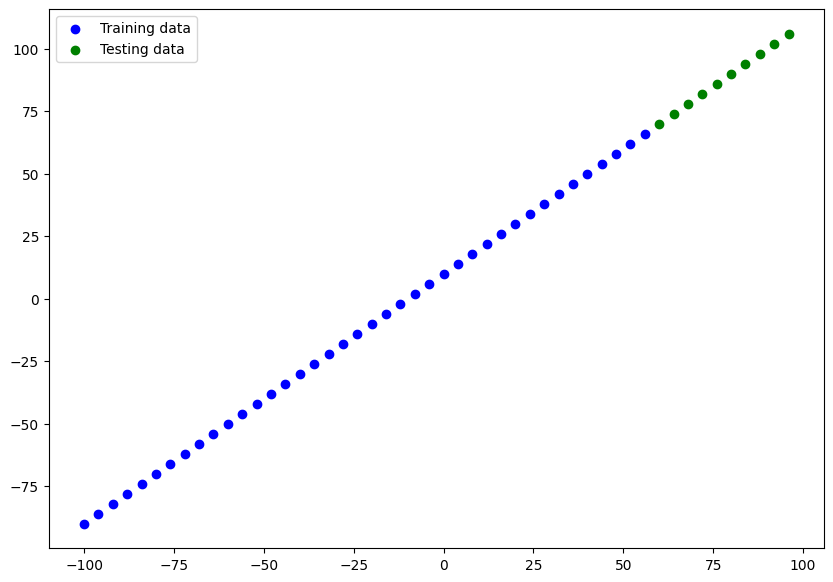

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend();

In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Visualizing the model

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [29]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


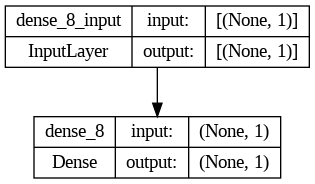

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# Visualizing the predictions

In [31]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


In [32]:
y_preds

array([[44.466248],
       [47.34279 ],
       [50.21933 ],
       [53.09587 ],
       [55.972412],
       [58.848953],
       [61.7255  ],
       [64.60204 ],
       [67.47858 ],
       [70.355125]], dtype=float32)

In [33]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

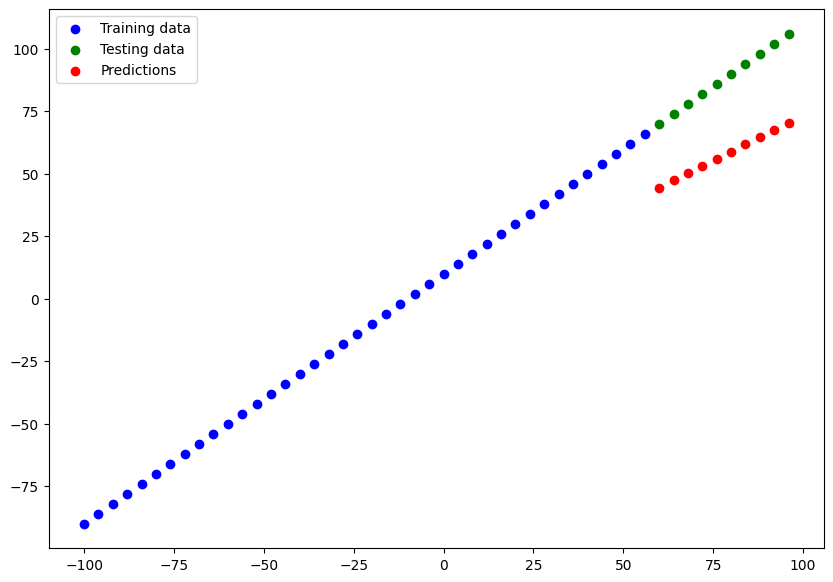

In [34]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating the predictions

In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 151ms/step - loss: 30.5893 - mae: 30.5893


[30.58931541442871, 30.58931541442871]

In [36]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.533752, 40.65721 , 37.78067 , 34.90413 , 32.027588, 29.151047,
       26.274502, 23.397957, 20.521423, 17.7159  ], dtype=float32)>

In [37]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [38]:
y_preds

array([[44.466248],
       [47.34279 ],
       [50.21933 ],
       [53.09587 ],
       [55.972412],
       [58.848953],
       [61.7255  ],
       [64.60204 ],
       [67.47858 ],
       [70.355125]], dtype=float32)

In [39]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [40]:
y_preds.shape

(10, 1)

In [41]:
y_preds.squeeze().shape

(10,)

In [42]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([44.466248, 47.34279 , 50.21933 , 53.09587 , 55.972412, 58.848953,
        61.7255  , 64.60204 , 67.47858 , 70.355125], dtype=float32))

In [43]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.589315>

In [44]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=946.11896>

In [45]:
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.58931541442871>

In [47]:
def mae(y_test, y_pred):
  """Calculuates mean absolute error between y_test and y_preds."""
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  """Calculates mean squared error between y_test and y_preds."""
  return tf.metrics.mean_squared_error(y_test, y_pred)

# Running experiments to improve a model

Model 1

In [48]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 84.7686 - mae: 84.7686
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 49.3132 - mae: 49.3132
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 14.6723 - mae: 14.6723
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 7.9305 - mae: 7.9305
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 10.3015 - mae: 10.3015
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5519 - mae: 9.5519
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.6754 - mae: 8.6754
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 9.0770 - mae: 9.0770
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 18.9678 - mae: 18.9678
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2523 - mae: 10.2523
Epoch 11/100
2/2 [==============================] - 0s 12m

1/1 [==============================] - 0s 48ms/step


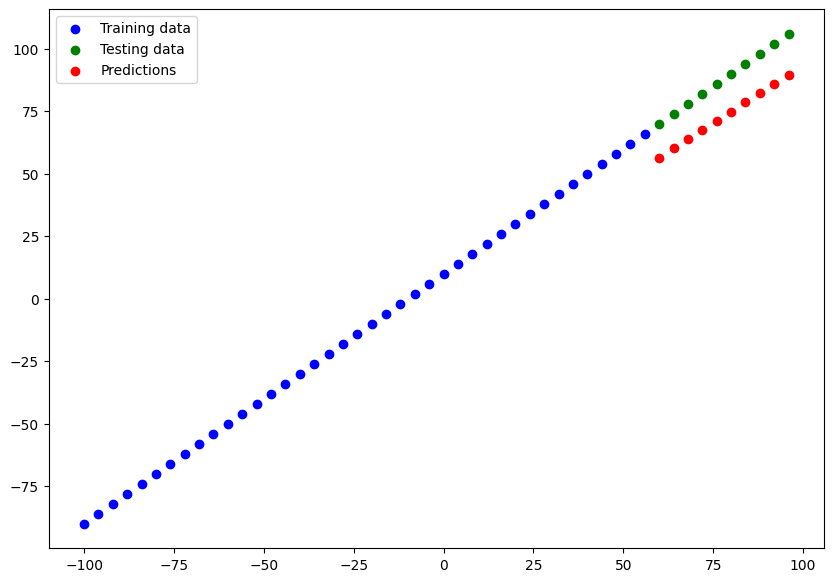

In [49]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [50]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(14.974112, 225.07014)

Model 2

In [51]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 56ms/step


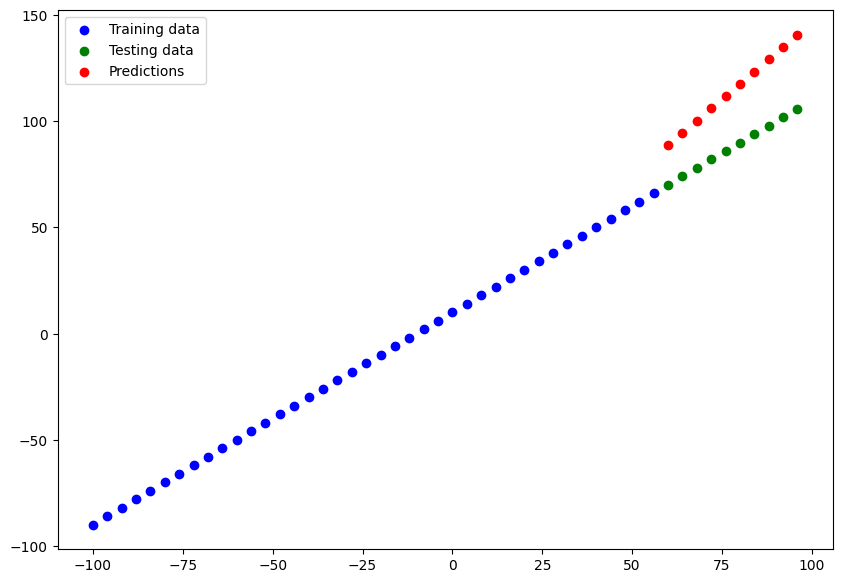

In [52]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(26.68928, 738.60974)

Model 3

In [56]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 191ms/step


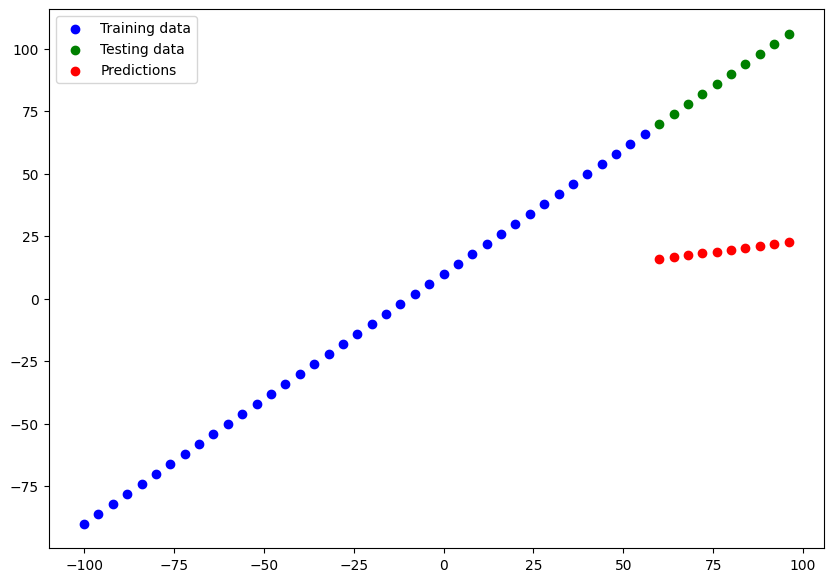

In [57]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.74746, 4812.7803)

#Comparing results

In [59]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [60]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.974112,225.070145
1,model_2,26.689280,738.609741
2,model_3,68.747459,68.747459


In [61]:
model_2.save('best_model_SavedModel_format')

In [62]:
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [63]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [64]:
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


#Loading the model

In [65]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 96ms/step


True

In [67]:
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [68]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 56ms/step


True

#Example

In [69]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
insurance = pd.read_csv("Insurance_data.csv")

In [71]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [73]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [74]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9205.1904 - mae: 9205.1904
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7812.1372 - mae: 7812.1372
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7553.7568 - mae: 7553.7568
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7712.3618 - mae: 7712.3618
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7736.1069 - mae: 7736.1069
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7602.2139 - mae: 7602.2139
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.1138 - mae: 7532.1138
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7768.6084 - mae: 7768.6084
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7599.2969 - mae: 7599.2969
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7751.6270 - mae: 7751.6270

In [77]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7305.8423 - mae: 7305.8423


[7305.84228515625, 7305.84228515625]

In [78]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [79]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4862.8164 - mae: 4862.8164


[4862.81640625, 4862.81640625]

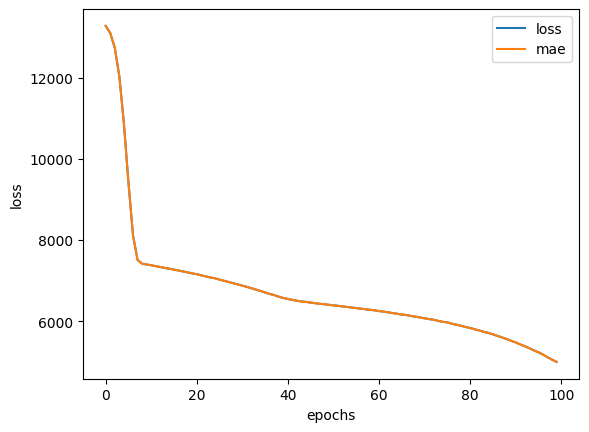

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [81]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [82]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 7ms/step - loss: 3496.8894 - mae: 3496.8894


(3496.889404296875, 3496.889404296875)

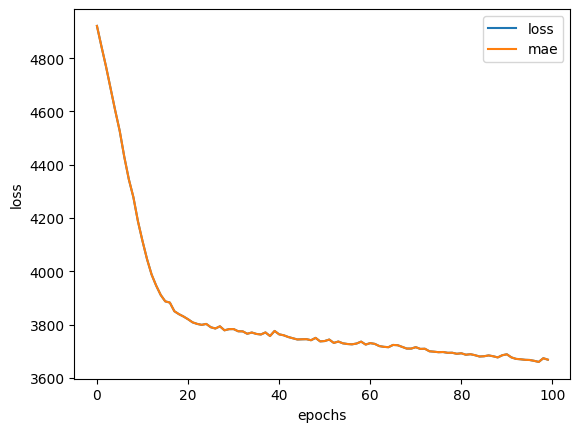

In [83]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Preprocessing data (normalization and standardization)

In [84]:
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("Insurance_data.csv")

In [86]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [88]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [89]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [90]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [91]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [92]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.5315 - mae: 3171.5315


In [93]:
insurance_model_2_mae, insurance_model_3_mae

(3496.889404296875, 3171.531494140625)